# Predict The Stock Market With Machine Learning And Python
## source: https://www.youtube.com/watch?v=1O_BenficgE

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# download S&P 500 historical stock data object
sp500 = yf.Ticker("^GSPC")

In [3]:
# query the stock price
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,0.0,0.0
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,0.0,0.0
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,0.0,0.0


In [4]:
sp500_col_names = sp500.columns
sp500_col_names

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-25 00:00:00-04:00', '2023-10-26 00:00:00-04:00',
               '2023-10-27 00:00:00-04:00', '2023-10-30 00:00:00-04:00',
               '2023-10-31 00:00:00-04:00', '2023-11-01 00:00:00-04:00',
               '2023-11-02 00:00:00-04:00', '2023-11-03 00:00:00-04:00',
               '2023-11-06 00:00:00-05:00', '2023-11-07 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24079, freq=None)

Clean and plot

<Axes: xlabel='Date'>

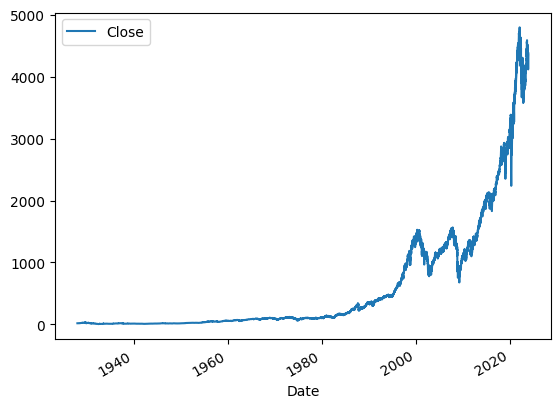

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
# useful for stock not index
del sp500["Dividends"]
del sp500["Stock Splits"]

<h1> Setting up traget for ML</h1>
predict price up or down

In [8]:
# create tomorrow column
sp500["Tomorrow"] = sp500["Close"].shift(-1)


In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,4317.779785,1
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,4358.339844,1
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980,1


In [10]:
# Market might shift its fundamental
# Get price after 1990-01-01
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,4317.779785,1
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,4358.339844,1
2023-11-03 00:00:00-04:00,4334.229980,4373.620117,4334.229980,4358.339844,4570960000,4365.979980,1


<h1>Training an Inital ML Model

In [27]:
# RandomForestClassifier
# averaging the decision tree
# hard to overfit
# run fast
# can pick up none lieaner tendence
from sklearn.ensemble import RandomForestClassifier

In [28]:
# init model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [29]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

print(preds)
precision = precision_score(test["Target"], preds)

print("precision_score: ", precision)

Date
2023-06-15 00:00:00-04:00    1
2023-06-16 00:00:00-04:00    0
2023-06-20 00:00:00-04:00    1
2023-06-21 00:00:00-04:00    1
2023-06-22 00:00:00-04:00    1
                            ..
2023-10-31 00:00:00-04:00    0
2023-11-01 00:00:00-04:00    0
2023-11-02 00:00:00-04:00    1
2023-11-03 00:00:00-04:00    1
2023-11-06 00:00:00-05:00    1
Length: 100, dtype: int64
precision_score:  0.4852941176470588


<Axes: xlabel='Date'>

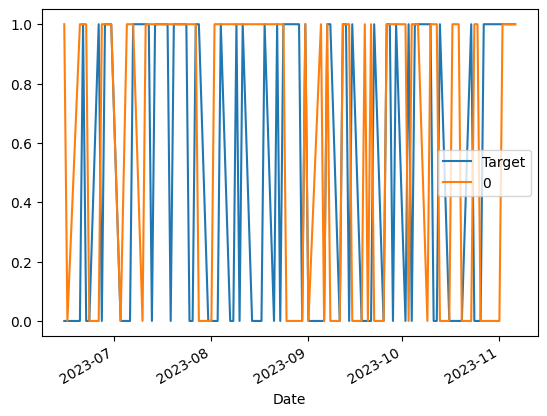

In [30]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

<h1>Building a backtesting system</h1>

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [36]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        precisions = predict(train, test, predictors, model)
        all_predictions.append(precisions)
    return pd.concat(all_predictions)


In [37]:
predictions = backtest(sp500, model, predictors)

In [38]:
predictions["Predictions"].value_counts()

Predictions
0    2794
1    2234
Name: count, dtype: int64

In [39]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5384959713518352

In [40]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.543357
0    0.456643
Name: count, dtype: float64

<h1>Adding additional predictors to the model</h1>

In [41]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]



/tmp/ipykernel_30310/984198452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
/tmp/ipykernel_30310/984198452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]


In [42]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [43]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,2.0,0.997275,4.0,1.009111,33.0,1.113282,138.0,1.517046,563.0
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,2.0,1.001967,4.0,1.012659,33.0,1.116599,139.0,1.521842,564.0
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,1.019783,4.0,1.032356,34.0,1.138015,140.0,1.551433,564.0
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,1.011259,4.0,1.028349,33.0,1.133204,140.0,1.545272,563.0
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,4.0,1.032949,33.0,1.137882,141.0,1.552105,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 00:00:00-04:00,4171.330078,4195.549805,4153.120117,4193.799805,4249470000,4237.859863,1,1.003227,2.0,1.008029,2.0,0.960267,27.0,1.004127,124.0,1.071585,526.0
2023-11-01 00:00:00-04:00,4201.270020,4245.640137,4197.740234,4237.859863,4224900000,4317.779785,1,1.005226,2.0,1.016123,3.0,0.971325,28.0,1.014212,125.0,1.082524,527.0
2023-11-02 00:00:00-04:00,4268.259766,4319.720215,4268.259766,4317.779785,4669780000,4358.339844,1,1.009341,2.0,1.026399,4.0,0.990210,29.0,1.032747,126.0,1.102594,527.0


<h1> Improving the model </h1>

In [44]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [45]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [46]:
predictions = backtest(sp500, model, new_predictors)

In [48]:
predictions["Predictions"].value_counts()

Predictions
0.0    3473
1.0     555
Name: count, dtype: int64

In [50]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5621621621621622

<h1>Summary and Next steps with the model</h1>